Games for: 2019-11-15


,Date,Visitor,Away Odds,Home,Home Odds,OT,Prediction,Chance,Result
293,2019-11-15,Boston Bruins,-105.0,Toronto Maple Leafs,-115.0,NaN,NaN,NaN,NaN
294,2019-11-15,Montreal Canadiens,140.0,Washington Capitals,-160.0,NaN,NaN,NaN,NaN
295,2019-11-15,Philadelphia Flyers,-145.0,Ottawa Senators,125.0,NaN,NaN,NaN,NaN
296,2019-11-15,Pittsburgh Penguins,-125.0,New Jersey Devils,105.0,NaN,NaN,NaN,NaN
297,2019-11-15,St. Louis Blues,-130.0,Columbus Blue Jackets,110.0,NaN,NaN,NaN,NaN


Gamestoday file updated
View something or add something or clear something? status
Total Accuracy: 57.00%
Reg Accuracy: 60.93%
OT/SO Accuracy: 48.98%
Profit if betting on every game: 955.94%
Games Played: 293
Regulation: 215
Overtimes: 49
Shootouts: 29
done


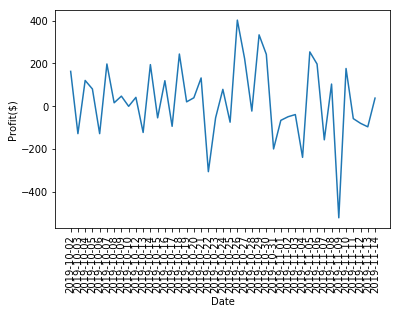

In [3]:
##ADD PREDICTIONS
##Factors for prediction
#1. xGF% Comparision
#2. Days of rest
#3. Home Ice
#4. Cap Percentage
#5. Goalie Rankings
#6. X Factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import csv
from datetime import date, timedelta
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.expand_frame_repr', False)

today = date.today()
print('Games for: '+str(today))
fTable = pd.read_csv('NHL2020.csv',sep=',')
gameday = fTable['Date']==str(today)
prevgame = fTable['Date']==str(today - timedelta(days = 1))
today = fTable[gameday]
prevday = fTable[prevgame]
display(today)
today.to_csv('GamesToday.csv')
print('Gamestoday file updated')

standardBet = [100]#[1,5,10,25,50,75,100,125,150,175,200,300,400,500,600,700,800,900,1000]

def fullTeamName(name):
    name = str(name).lower()
    if name == 'Anaheim Ducks'.lower() or name == 'Anaheim'.lower() or name == 'Ducks'.lower():
        return 'ANA'
    elif name == 'Arizona Coyotes'.lower() or name == 'Arizona'.lower() or name == 'Coyotes'.lower():
        return 'ARI'
    elif name == 'Boston Bruins'.lower() or name == 'Boston'.lower() or name == 'Bruins'.lower():
        return 'BOS'
    elif name == 'Buffalo Sabres'.lower() or name == 'Buffalo'.lower() or name == 'Sabres'.lower():
        return 'BUF'
    elif name == 'Calgary Flames'.lower() or name == 'Calgary'.lower() or name == 'Flames'.lower():
        return 'CGY'
    elif name == 'Carolina Hurricanes'.lower() or name == 'Carolina'.lower() or name == 'Hurricanes'.lower():
        return 'CAR'
    elif name == 'Chicago Blackhawks'.lower() or name == 'Chicago'.lower() or name == 'Blackhawks'.lower():
        return 'CHI'
    elif name == 'Colorado Avalanche'.lower() or name == 'Colorado'.lower() or name == 'Avalanche'.lower():
        return 'COL'
    elif name == 'Columbus Blue Jackets'.lower() or name == 'Columbus'.lower() or name == 'Blue Jackets'.lower() or name == 'Jackets'.lower():
        return 'CBJ'  
    elif name == 'Dallas Stars'.lower() or name == 'Dallas'.lower() or name == 'Stars'.lower():
        return 'DAL'
    elif name == 'Detroit Red Wings'.lower() or name == 'Detroit'.lower() or name == 'Red Wings'.lower() or name == 'Wings'.lower():
        return 'DET'
    elif name == 'Edmonton Oilers'.lower() or name == 'Edmonton'.lower() or name == 'Edmonton'.lower() or name == 'Oilers'.lower():
        return 'EDM'
    elif name == 'Florida Panthers'.lower() or name == 'Florida'.lower() or name == 'Panthers'.lower():
        return 'FLA'
    elif name == 'Los Angeles Kings'.lower() or name == 'Los Angeles'.lower() or name == 'Kings'.lower():
        return 'L.A'
    elif name == 'Minnesota Wild'.lower() or name == 'Minnesota'.lower() or name == 'Wild'.lower():
        return 'MIN'
    elif name == 'Montreal Canadiens'.lower() or name == 'Montreal'.lower() or name == 'Canadiens'.lower():
        return 'MTL'
    elif name == 'New Jersey Devils'.lower() or name == 'New Jersey'.lower() or name == 'Devils'.lower():
        return 'N.J'
    elif name == 'Nashville Predators'.lower() or name == 'Nashville'.lower() or name == 'Predators'.lower():
        return 'NSH'
    elif name == 'New York Islanders'.lower() or name == 'Islanders'.lower():
        return 'NYI'
    elif name == 'New York Rangers'.lower() or name == 'Rangers'.lower():
        return 'NYR'
    elif name == 'Ottawa Senators'.lower() or name == 'Ottawa'.lower() or name == 'Senators'.lower():
        return 'OTT'
    elif name == 'Philadelphia Flyers'.lower() or name == 'Philadelphia'.lower() or name == 'Flyers'.lower():
        return 'PHI'
    elif name == 'Pittsburgh Penguins'.lower() or name == 'Pittsburgh'.lower() or name == 'Penguins'.lower():
        return 'PIT'
    elif name == 'San Jose Sharks'.lower() or name == 'San Jose'.lower() or name == 'Sharks'.lower():
        return 'S.J'
    elif name == 'St. Louis Blues'.lower() or name == 'St. Louis'.lower() or name == 'Blues'.lower():
        return 'STL'
    elif name == 'Tampa Bay Lightning'.lower() or name == 'Tampa Bay'.lower() or name == 'Lightning'.lower():
        return 'T.B'
    elif name == 'Toronto Maple Leafs'.lower() or name == 'Toronto'.lower() or name == 'Leafs'.lower():
        return 'TOR'
    elif name == 'Vancouver Canucks'.lower() or name == 'Vancouver'.lower() or name == 'Canucks'.lower():
        return 'VAN'
    elif name == 'Vegas Golden Knights'.lower() or name == 'Vegas'.lower() or name == 'Golden Knights'.lower() or name == 'Knights'.lower():
        return 'VGK'
    elif name == 'Winnipeg Jets'.lower() or name == 'Winnipeg'.lower() or name == 'Jets'.lower():
        return 'WPG'
    elif name == 'Washington Capitals'.lower() or name == 'Washington'.lower() or name == 'Capitals'.lower():
        return 'WSH'

def checkWinner(score1,score2):
    if score1 > score2:
        return True
    else:
        return False
    
def checkPred(pred,result):
    return pred == result

def cleanOdds(odd,bet):
    if odd<0:
        return bet / (abs(odd)/100)
    else: 
        return bet * (abs(odd)/100)

ask = input('View something or add something or clear something? ')
if ask == 'add':
    wTable = pd.read_csv('Predictions.csv')
    display(wTable)
    
    for i in today.index:
        teamA = today.at[i,'Visitor']
        teamH = today.at[i,'Home']
        today.at[i,'Prediction'] = input('Winner of '+ teamA+' at '+teamH+': ')
    wTable.index = today.index
    today['Chance'] = wTable['Percent']
    
    display(today) 
    
    save = input('Save to File? ')
    if save == 'fix':
        for i in today.index:
            today.at[i,'Chance'] = input('Input Chance for this winner: ')
        display(today) 
    
    save = input('Save to File? ')

    if save == 'yes':
        fTable[gameday] = today
        fTable.to_csv('NHL2020.csv',index = False)
        print('File Saved')
    
elif ask == 'view prev':
    display(prevday)
#elif ask == 'view week':
    #print(fTable[fTable['Date']==str(date.today()+timedelta(days=6))])
    
#elif ask == 'view month':
    #print()
    
#elif ask == 'view team ;code;':
    #print()    

elif ask == 'status':
    fTable['Prediction'] = fTable['Prediction'].apply(fullTeamName)
    fTable['Result'] = fTable['Result'].apply(fullTeamName)
    fTable['Visitor'] = fTable['Visitor'].apply(fullTeamName)
    fTable['Home'] = fTable['Home'].apply(fullTeamName)
    fTable['Correct'] = np.vectorize(checkPred)(fTable['Prediction'],fTable['Result'])
    otTable = fTable[pd.notnull(fTable['OT'])]
    otTable = otTable[otTable.OT != 'SO']
    regTable = fTable[pd.notnull(fTable['Result'])]
    regTable = regTable[regTable.OT != 'OT']
    regTable = regTable[regTable.OT != 'SO']
    fTable = fTable[pd.notnull(fTable['Result'])]
    full = fTable.groupby(['Correct']).count()
    right = full.at[True,'Date']
    wrong = full.at[False,'Date']
    total = right + wrong
    print('Total Accuracy: '+ "{0:.2%}".format(right/total))
    regTable = regTable.groupby(['Correct']).count()
    right = regTable.at[True,'Date']
    wrong = regTable.at[False,'Date']
    regtotal = right + wrong
    print('Reg Accuracy: '+ "{0:.2%}".format(right/regtotal))
    otTable = otTable.groupby(['Correct']).count()
    right = otTable.at[True,'Date']
    wrong = otTable.at[False,'Date']
    ottotal = right + wrong
    print('OT/SO Accuracy: '+ "{0:.2%}".format(right/ottotal))
    
    bTable = fTable[pd.notnull(fTable['Away Odds'])]
    bTable = bTable[pd.notnull(bTable['Home Odds'])]
    bTable['Pick Odds'] = np.where(bTable['Visitor']==bTable['Prediction'], bTable['Away Odds'], bTable['Home Odds'])
    bTable['Net Profit'] = np.where(bTable['Correct'] == True,np.vectorize(cleanOdds)(bTable['Pick Odds'],standardBet[0]),-standardBet[0])
    bTable = bTable.groupby(['Date']).sum().reset_index()
    plt.plot(np.arange(0,bTable.index.size),bTable['Net Profit'])
    plt.xticks(np.arange(0,bTable.index.size),bTable['Date'],rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Profit($)')
    
    p = bTable['Net Profit'].sum()
    print('Profit if betting on every game: '+ "{0:.2%}".format(p/100))
    print('Games Played: '+ str(fTable[pd.notnull(fTable['Result'])].index.size))
    print('Regulation: '+str(regtotal))
    print('Overtimes: '+str(ottotal))
    print('Shootouts: '+str(fTable[fTable['OT'] == 'SO'].index.size))
    
    
    
    
    #pTable = pd.DataFrame(index = standardBet,columns = ['Profit'])
    #pTable.index.name = 'Bet Amount($)'
    #for i in range(len(standardBet)):
        #bTable = fTable[pd.notnull(fTable['Away Odds'])]
        #bTable = bTable[pd.notnull(bTable['Home Odds'])]
       # print('Standard Bet: '+"${:,.2f}".format(standardBet[i]))
        #bTable['Pick Odds'] = np.where(bTable['Visitor']==bTable['Prediction'], bTable['Away Odds'], bTable['Home Odds'])
        #bTable['Net Profit'] = np.where(bTable['Correct'] == True,np.vectorize(cleanOdds)(bTable['Pick Odds'],standardBet[i]),-standardBet[i])
        #p = bTable['Net Profit'].sum()
       # print('Net Profit: ',"${:,.2f}".format(p))
        #pTable.at[standardBet[i],'Profit'] = p
    #tabelSize = bTable[pd.notnull(bTable['Result'])].index.size
    #xax = np.arange(0,tabelSize)
    #display(bTable)
    #plt.plot(xax,bTable['Net Profit'])
    #plt.xticks(np.arange(0,tabelSize,10),rotation=90)
    #plt.xlabel('Game#')
    #plt.ylabel('Profit($)')
    #print('Profit if betting on every game: '+ "{0:.2%}".format(p/1000))
    #print('Games Played: '+str(tabelSize))
    
elif ask == 'fix goalies':
    gTable = pd.read_csv('GoalieTier.csv')
    gTable.set_index('Team',inplace=True)
    display(gTable)
    team = input('Team Code ')
    display(gTable.loc[team,:])
    swap = input('SWAP goalies or CHANGE starter tier ')
    if swap == 'swap':
        temp = gTable.at[team,'Starter']
        tempt = gTable.at[team,'S Tier']
        gTable.at[team,'Starter'] = gTable.at[team,'Backup']
        gTable.at[team,'S Tier'] = gTable.at[team,'B Tier']
        gTable.at[team,'Backup'] = temp
        gTable.at[team,'B Tier'] = tempt
        display(gTable.loc[team,:])
    elif swap == 'change':
        print(gTable.at[team,'Starter']+'is currently a Tier '+ gTable.at[team,'S Tier']+'. What would you like to change it to?')
        new = input('New Tier ')
        gTable.at[team,'S Tier'] = new
        print('Tier Updated')
        display(gTable.loc[team,:])
    save = input('Save File? ')
    if save == 'yes':
        gTable.to_csv('GoalieTier.csv')
        print('File saved')

elif ask == 'view season':
    display(fTable)
    
elif ask == 'add odds':
    #%run NHLVegasLines.ipynb
    display(today)
    ind = today.index.values[0]
    oTable = pd.read_csv('DailyOdds.csv',sep=',')
    display(oTable) 
    today = today.sort_values(by='Visitor').reset_index(drop = True)
    today['Away Odds'] = oTable['Away Odds']
    today['Home Odds'] = oTable['Home Odds']
    display(today)
    save = input('Save to File?')
    if save == 'yes':
        today.index = today.index+ind
        fTable[gameday] = today
        fTable = fTable.reset_index(drop = True)
        fTable.to_csv('NHL2020.csv',index = False)
        print('File Saved')
   
 
elif ask == 'clear today':
    today['Prediction'] = None
    today['Home Odds'] = None
    today['Away Odds'] = None
    today['OT'] = None
    display(today)
    save = input('Save to File? ')
    if save == 'yes':
        display(today)
        fTable[gameday] = today
        fTable.to_csv('NHL2020.csv',index = False)
        print('File Saved')
    
elif ask == 'add results':
    ind = today.index.values[0]
    url = 'https://www.hockey-reference.com/leagues/NHL_2020_games.html'
    print(url)
    html = requests.get(url).content
    rTable = pd.read_html(html)[0]
    rTable = rTable.loc[:,['Visitor','G','G.1','Unnamed: 5']]
    rTable = rTable.sort_values(by = 'Visitor')
    del rTable['Visitor']
    rTable = rTable[prevgame]
    rTable.index = fTable[prevgame].index
    prevday['OT'] = rTable['Unnamed: 5']
    prevday['Result'] = np.vectorize(checkWinner)(rTable['G'],rTable['G.1'])
    prevday['Result'] = np.where(prevday['Result']==True,prevday['Visitor'],prevday['Home'])
    display(prevday)
    prevday.to_csv('PrevDay.csv',index = False)
    save = input('Save to File? ')
    if save == 'yes':
        #prevday.index = prevday.index+ind
        fTable[prevgame] = prevday
        fTable.to_csv('NHL2020.csv',index = False)
        print('File Saved')

print('done')

In [4]:
import pandas as pd
import numpy as np
import requests
import csv
pd.set_option('display.expand_frame_repr',False)
def fullTeamName(name):
    name = name.lower()
    if name == 'Anaheim Ducks'.lower() or name == 'Anaheim'.lower() or name == 'Ducks'.lower():
        return 'ANA'
    elif name == 'Arizona Coyotes'.lower() or name == 'Arizona'.lower() or name == 'Coyotes'.lower():
        return 'ARI'
    elif name == 'Boston Bruins'.lower() or name == 'Boston'.lower() or name == 'Bruins'.lower():
        return 'BOS'
    elif name == 'Buffalo Sabres'.lower() or name == 'Buffalo'.lower() or name == 'Sabres'.lower():
        return 'BUF'
    elif name == 'Calgary Flames'.lower() or name == 'Calgary'.lower() or name == 'Flames'.lower():
        return 'CGY'
    elif name == 'Carolina Hurricanes'.lower() or name == 'Carolina'.lower() or name == 'Hurricanes'.lower():
        return 'CAR'
    elif name == 'Chicago Blackhawks'.lower() or name == 'Chicago'.lower() or name == 'Blackhawks'.lower():
        return 'CHI'
    elif name == 'Colorado Avalanche'.lower() or name == 'Colorado'.lower() or name == 'Avalanche'.lower():
        return 'COL'
    elif name == 'Columbus Blue Jackets'.lower() or name == 'Columbus'.lower() or name == 'Blue Jackets'.lower() or name == 'Jackets'.lower():
        return 'CBJ'  
    elif name == 'Dallas Stars'.lower() or name == 'Dallas'.lower() or name == 'Stars'.lower():
        return 'DAL'
    elif name == 'Detroit Red Wings'.lower() or name == 'Detroit'.lower() or name == 'Red Wings'.lower() or name == 'Wings'.lower():
        return 'DET'
    elif name == 'Edmonton Oilers'.lower() or name == 'Edmonton'.lower() or name == 'Edmonton'.lower() or name == 'Wings'.lower():
        return 'EDM'
    elif name == 'Florida Panthers'.lower() or name == 'Florida'.lower() or name == 'Panthers'.lower():
        return 'FLA'
    elif name == 'Los Angeles Kings'.lower() or name == 'Los Angeles'.lower() or name == 'Kings'.lower():
        return 'L.A'
    elif name == 'Minnesota Wild'.lower() or name == 'Minnesota'.lower() or name == 'Wild'.lower():
        return 'MIN'
    elif name == 'Montreal Canadiens'.lower() or name == 'Montreal'.lower() or name == 'Canadiens'.lower():
        return 'MTL'
    elif name == 'New Jersey Devils'.lower() or name == 'New Jersey'.lower() or name == 'Devils'.lower():
        return 'N.J'
    elif name == 'Nashville Predators'.lower() or name == 'Nashville'.lower() or name == 'Predators'.lower():
        return 'NSH'
    elif name == 'New York Islanders'.lower() or name == 'Islanders'.lower():
        return 'NYI'
    elif name == 'New York Rangers'.lower() or name == 'Rangers'.lower():
        return 'NYR'
    elif name == 'Ottawa Senators'.lower() or name == 'Ottawa'.lower() or name == 'Senators'.lower():
        return 'OTT'
    elif name == 'Philadelphia Flyers'.lower() or name == 'Philadelphia'.lower() or name == 'Flyers'.lower():
        return 'PHI'
    elif name == 'Pittsburgh Penguins'.lower() or name == 'Pittsburgh'.lower() or name == 'Penguins'.lower():
        return 'PIT'
    elif name == 'San Jose Sharks'.lower() or name == 'San Jose'.lower() or name == 'Sharks'.lower():
        return 'S.J'
    elif name == 'St. Louis Blues'.lower() or name == 'St. Louis'.lower() or name == 'Blues'.lower():
        return 'STL'
    elif name == 'Tampa Bay Lightning'.lower() or name == 'Tampa Bay'.lower() or name == 'Lightning'.lower():
        return 'T.B'
    elif name == 'Toronto Maple Leafs'.lower() or name == 'Toronto'.lower() or name == 'Leafs'.lower():
        return 'TOR'
    elif name == 'Vancouver Canucks'.lower() or name == 'Vancouver'.lower() or name == 'Canucks'.lower():
        return 'VAN'
    elif name == 'Vegas Golden Knights'.lower() or name == 'Vegas'.lower() or name == 'Golden Knights'.lower() or name == 'Knights'.lower():
        return 'VGK'
    elif name == 'Winnipeg Jets'.lower() or name == 'Winnipeg'.lower() or name == 'Jets'.lower():
        return 'WPG'
    elif name == 'Washington Capitals'.lower() or name == 'Washington'.lower() or name == 'Capitals'.lower():
        return 'WSH'


    
    
ask = ''
fTable = pd.read_csv('2018-2019 Table.csv',sep=',')
xTable = pd.read_csv('../NST Trim/2020 xGF% Table.csv',index_col = 'Team')
cTable = pd.read_csv('../NST Trim/2020 CF% Table.csv',index_col = 'Team')

dTable = pd.read_csv('GamesToday.csv',sep=',')
fTable.set_index('index',inplace=True)

pTable = pd.read_csv('PrevDay.csv')
b2bList= pTable['Visitor'].tolist()
b2bList.extend(pTable['Home'].tolist())
for i in range(len(b2bList)):
    b2bList[i] = fullTeamName(b2bList[i])

print('https://www.rotowire.com/hockey/starting-goalies.php')
#url = 'https://www.rotowire.com/hockey/starting-goalies.php'
#html = requests.get(url).content
#goalies = pd.read_html(html)
#display(goalies[0])

games = []
percent = []
for i in range(len(dTable.index)):
    home = dTable.at[i,'Home']#input('Home: ')
    home = fullTeamName(home)
    print('Home: '+home)
    away = dTable.at[i,'Visitor']#input('Away: ')
    away = fullTeamName(away)
    print('Away: '+away)
    
    #2020 CF%
    status = cTable.loc[home,away]
    cperc = 0

    if status == 'Dominate':
        sign = '+'
        cperc = 4
    elif status == 'Favorite':
        sign = '+'
        cperc = 3
    elif status == 'Slight Edge':
        sign = '+'
        cperc = 2
    elif status == 'Lucky':
        sign = '+'
        cperc = 1

    elif status == 'Unlucky':
        cperc = -1
    elif status == 'Slight Disadvantage':
        cperc = -2
    elif status == 'Underdog':
        cperc = -3
    elif status == 'Struggling':
        cperc = -4
    else:
        cperc = 0
    
    
    
    #2020 xGF%
    status = xTable.loc[home,away]
    perc = 0

    if status == 'Dominate':
        sign = '+'
        xperc = 8
    elif status == 'Favorite':
        sign = '+'
        xperc = 6
    elif status == 'Slight Edge':
        sign = '+'
        xperc = 4
    elif status == 'Lucky':
        sign = '+'
        xperc = 2

    elif status == 'Unlucky':
        xperc = -2
    elif status == 'Slight Disadvantage':
        xperc = -4
    elif status == 'Underdog':
        xperc = -6
    elif status == 'Struggling':
        xperc = -8
    else:
        xperc = 0
    
    #2018-2019 xGF%
    status = fTable.loc[away,home]
    perc = 0

    if status == 'Dominate':
        sign = '+'
        perc = 13
    elif status == 'Favorite':
        sign = '+'
        perc = 10
    elif status == 'Slight Edge':
        sign = '+'
        perc = 7
    elif status == 'Lucky':
        sign = '+'
        perc = 4

    elif status == 'Unlucky':
        perc = -4
    elif status == 'Slight Disadvantage':
        perc = -7
    elif status == 'Underdog':
        perc = -10
    elif status == 'Struggling':
        perc = -13
    else:
        perc = 0

    gTable = pd.read_csv('GoalieTier.csv',index_col = 'Team')
    hstart = gTable.loc[home,'Starter']
    astart = gTable.loc[away,'Starter']
    back = input(str(hstart)+' starting? ')
    if back == 'yes':
        gHome = gTable.loc[home,'S Tier']
    elif back == 'sub':
        gHome = int(input('Tier of home sub goalie? '))
    else:
        gHome = gTable.loc[home,'B Tier']
    
    back = ''
    back = input(astart+' starter? ')
    if back == 'yes':
        gAway = gTable.loc[away,'S Tier']
    elif back == 'sub':
        gAway = int(input('Tier of away sub goalie? '))
    else:
        gAway = gTable.loc[away,'B Tier']
    
    gDiff = gHome - gAway
    
    if gDiff == -4:
        gPerc = 15
    elif gDiff == -3:
        gPerc = 10
    elif gDiff == -2:
        gPerc = 5
    elif gDiff == -1:
        gPerc = 2.5
    elif gDiff == 1:
        gPerc = -2.5
    elif gDiff == 2:
        gPerc = -5
    elif gDiff == 3:
        gPerc = -10
    elif gDiff == 4:
        gPerc = -15

    else:
        gPerc = 0
   
    

    hPerc = 5
    

    
    if away in b2bList:
        bPerc = 5
    elif home in b2bList:
        bPerc = -5
    else:
        bPerc = 0
    if away and home in b2bList:
        bPerc = 0
    
    
    #input('Grab cap data? ')
    #if ask == 'yes':
        #url = 'https://www.capfriendly.com/'
        #html = requests.get(url).content
        #dfList = pd.read_html(html)
        #cTable = dfList[3]
        #cTable = cTable.loc[:,['TEAM', 'PROJECTED CAP SPACE']]
        #cPerc = 0#input('Type the percent bonus from cap space difference')

    #else:
        #cPerc = 0
    #xPerc = 0#input('Type an x-factor bonus/subtract for the home team')
 
    tPerc = hPerc+bPerc+gPerc+perc+xperc+cperc
    print('At Home bonus: '+hPerc)
    print('Back to Back Bonus: '+bPerc)
    print('Goalie Diff Bonus: '+gPerc)
    print('2017-2019 Bonus: '+perc)
    print('2020xGF% Bonus: '+xperc)
    print('2020CF% Bonus: '+cperc)
    print(home+' gets a total bonus of '+str(tPerc)+'%')

    wPerc = float(.5 * 1+(tPerc/100))
    lPerc = float(1-wPerc)

    print(home + ' chance: '+ str(round(wPerc*100,5)))
    print(away + ' chance: '+ str(round(lPerc*100,5)))
    if wPerc > lPerc:
        print('Prediction: '+ home)
        games.append(home)
        percent.append(str("{0:.2%}".format(wPerc)))
    else:
        print('Prediction: '+ away)
        games.append(away)
        percent.append(str("{0:.2%}".format(lPerc)))
for i in range(len(games)):        
    print(games[i] + ' ' + percent[i])

wTable = pd.DataFrame(columns = ['Prediction','Percent'])
wTable['Prediction'] = games
wTable['Percent'] = percent
display(wTable)
wTable.to_csv('Predictions.csv',index = False)
print('done')

https://www.rotowire.com/hockey/starting-goalies.php
Home: TOR
Away: BOS
Andersen starting? yes
Rask starter? yes


TypeError: can only concatenate str (not "int") to str

In [ ]:
#FIXER FIXER MISTER MISTER
import pandas as pd
import numpy as np
import requests
from datetime import date,timedelta

url = 'https://www.hockey-reference.com/leagues/NHL_2020_games.html'
html = requests.get(url).content
fTable = pd.read_html(html)[0]
today = date.today()
fTable = fTable[fTable['Date'] == str(today)]
#fTable = fTable.loc[:,['Date','Visitor','Home']]
del fTable['Notes']
display(fTable)
#fTable.to_csv('FixToday.csv', index = False)
print('file saved')


In [20]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os

driver = webdriver.Chrome()
driver.get('https://www.rotowire.com/hockey/starting-goalies.php')
driver.implicitly_wait(5)
table = driver.find_element_by_xpath('/html/body/div[1]/div/main/div[2]/div/div')
table_html = table.get_attribute('innerHTML')

df = pd.read_html(table_html)[0]
display(df)
driver.close()

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Away,Away,Away,Home,Home,Home
2,Time,Team,Goalie,Status,Team,Goalie,Status


In [ ]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.expand_frame_repr', False)


today = date.today() + timedelta(days = 4)
yesterday = today - timedelta(days = 1)


fTable = pd.read_csv('NHL2020.csv',sep=',')
fTable.head()
gameday = fTable['Date']==str(today)
prevDay = fTable['Date'] == str(yesterday)
gameday = fTable[gameday]
prevDay = fTable[prevDay]

todayTeams = gameday[['Visitor','Home']]
prevTeams = prevDay[['Visitor','Home']]

print('Games for: '+str(today))
print(todayTeams)
print('Games for: '+ str(yesterday))
print(prevTeams)








In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.expand_frame_repr', False)

teamCodes = ['ANA','ARI','BOS','BUF','CAR','CBJ','CGY','CHI','COL','DAL','DET','EDM','FLA','L.A','MIN','MTL','N.J','NSH','NYI','NYR','OTT','PHI','PIT','S.J','STL','T.B','TOR','VAN','VGK','WPG','WSH']
team = 'ANA'
cTable = pd.DataFrame(index = teamCodes,columns = teamCodes)
cTable = cTable.reset_index()

def teamToCode(opp):
    if 'Av' in opp:
        return 'COL'
    elif 'Bla' in opp:
        return 'CHI'
    elif 'BlueJ' in opp:
        return 'CBJ'
    elif 'Blues' in opp:
        return 'STL'
    elif 'Brui' in opp:
        return 'BOS'
    elif 'Cana' in opp:
        return 'MTL'
    elif 'Canu' in opp:
        return 'VAN'
    elif 'Cap' in opp:
        return 'WSH'
    elif 'Co' in opp:
        return 'ARI'
    elif 'De' in opp:
        return 'N.J'
    elif 'Du' in opp:
        return 'ANA'
    elif 'Fla' in opp:
        return 'CGY'
    elif 'Fly' in opp:
        return 'PHI'
    elif 'Gol' in opp:
        return 'VGK'
    elif 'Hur' in opp:
        return 'CAR'
    elif 'Isl' in opp:
        return 'NYI'
    elif 'Jets' in opp:
        return 'WPG'
    elif 'Kin' in opp:
        return 'L.A'
    elif 'Lig' in opp:
        return 'T.B'
    elif 'Map' in opp:
        return 'TOR'
    elif 'Oil' in opp:
        return 'EDM'
    elif 'Pan' in opp:
        return 'FLA'
    elif 'Pen' in opp:
        return 'PIT'
    elif 'Pred' in opp:
        return 'NSH'
    elif 'Rang' in opp:
        return 'NYR'
    elif 'Red' in opp:
        return 'DET'
    elif 'Sab' in opp:
        return 'BUF'
    elif 'Sen' in opp:
        return 'OTT'
    elif 'Sha' in opp:
        return 'S.J'
    elif 'Sta' in opp:
        return 'DAL'
    elif 'Wild' in opp:
        return 'MIN'
      
stat = 'xGF'
for i in range(len(teamCodes)):
    team = teamCodes[i]
    file = team+stat+' status.csv'
    print(file)
    fTable = pd.read_csv(file,sep = ',')
    fTable['Opp'] = np.vectorize(teamToCode)(fTable['Opp'])
    fTable = fTable.append({'Opp':team,'STATUS':None},ignore_index=True)
    fTable = fTable.sort_values(by = 'Opp').reset_index()
    cTable[team] = fTable['STATUS']    

print(cTable)
cTable.to_csv('2018-2019 Table.csv')